In [82]:
# import necessary librariies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [83]:
url= 'https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv'
df=pd.read_csv(url)
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [84]:
df.shape

(92016, 5)

In [85]:
print(df.info())
print('='*98)
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB
None
FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64


In [86]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [87]:
df.FullDate=pd.to_datetime(df.FullDate)
df=df.set_index('FullDate')


In [88]:
daily_df = df.resample('D').sum()
daily_df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [89]:
daily_df.shape

(3834, 4)

<Axes: >

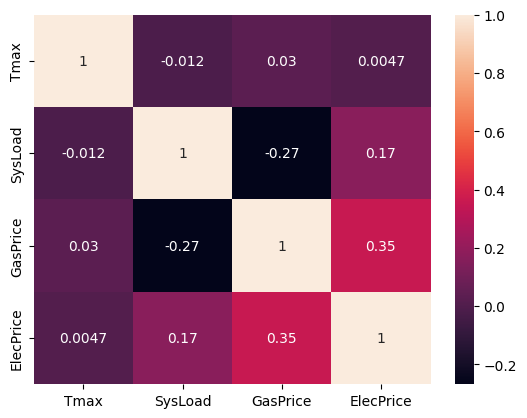

In [90]:
# plotting heatmap for correlation of daily_df
# fir,ax = plt.subplots(figsize=(6,6))
sns.heatmap(daily_df.corr(),annot=True)


Q.11. Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

Text(0, 0.5, 'ElecPrice')

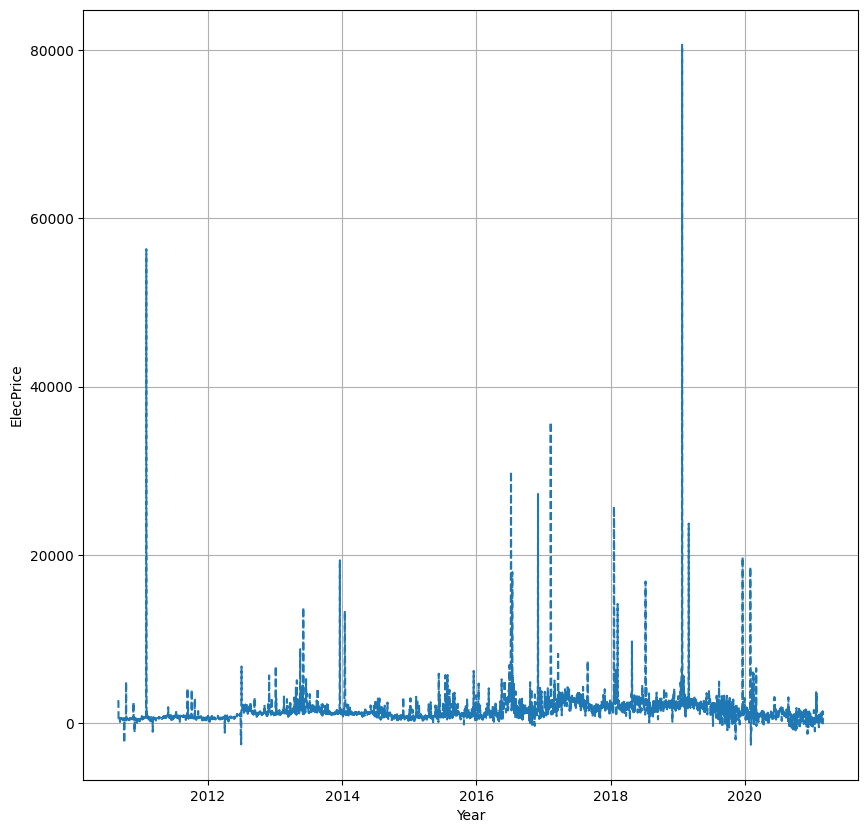

In [91]:
plt.figure(figsize=(10,10))
plt.plot(daily_df.index,daily_df.ElecPrice,'--')
plt.grid()
plt.xlabel('Year')
plt.ylabel('ElecPrice')


Q.12: Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [92]:
for col in ['SysLoad','GasPrice']:
  res=adfuller(daily_df[col])
  print(f'P-value for{col}:{res[1]:.6f}')

P-value forSysLoad:0.004254
P-value forGasPrice:0.045027


Q. 13: Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [93]:
for col in ['GasPrice','ElecPrice']:
  res=adfuller(daily_df[col])
  print (f'Critical values for {col}:')
  for x ,y in res[4].items():
    print(f'\t{x}:{y:.4f}')

Critical values for GasPrice:
	1%:-3.4321
	5%:-2.8623
	10%:-2.5672
Critical values for ElecPrice:
	1%:-3.4321
	5%:-2.8623
	10%:-2.5672


In [94]:
train_df = daily_df.iloc[:2757,:]
test_df = daily_df.iloc[2757:,:]

train_df.reset_index(inplace = True)
train_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [95]:
train= train_df.iloc[:,[0,-1]]
train= train.rename(columns={'FullDate':'ds','ElecPrice':'y'})
train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [96]:
test_df.reset_index(inplace=True)
test= test_df.iloc[:,[0,-1]]
test= test.rename(columns={'FullDate':'ds','ElecPrice':'y'})
test.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [97]:

from prophet import Prophet
univariate_model = Prophet()
univariate_model.fit(train)

forecaste_train = univariate_model.predict(test)
forecaste_train.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1a46vi8c/sdoki6jb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1a46vi8c/57wmmtr6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71558', 'data', 'file=/tmp/tmp1a46vi8c/sdoki6jb.json', 'init=/tmp/tmp1a46vi8c/57wmmtr6.json', 'output', 'file=/tmp/tmp1a46vi8c/prophet_modeloi5ldgip/prophet_model-20230404184832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:48:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:48:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2687.807715,133.901001,4910.646048,2687.807715,2687.807715,-155.281939,-155.281939,-155.281939,9.737752,9.737752,9.737752,-165.019691,-165.019691,-165.019691,0.0,0.0,0.0,2532.525776
1,2018-03-21,2688.609367,268.735580,5059.718214,2688.609367,2688.609367,-2.749381,-2.749381,-2.749381,159.365206,159.365206,159.365206,-162.114587,-162.114587,-162.114587,0.0,0.0,0.0,2685.859986
2,2018-03-22,2689.411018,426.421311,5265.650013,2689.411018,2689.411018,95.475991,95.475991,95.475991,257.121966,257.121966,257.121966,-161.645975,-161.645975,-161.645975,0.0,0.0,0.0,2784.887009
3,2018-03-23,2690.212670,191.810264,5085.030488,2690.212670,2690.212670,-113.171619,-113.171619,-113.171619,50.276706,50.276706,50.276706,-163.448325,-163.448325,-163.448325,0.0,0.0,0.0,2577.041051
4,2018-03-24,2691.014321,-214.663692,4678.755952,2691.014321,2691.014321,-438.734727,-438.734727,-438.734727,-271.455065,-271.455065,-271.455065,-167.279662,-167.279662,-167.279662,0.0,0.0,0.0,2252.279594


Q. 14: Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [98]:

def metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100
mape = metric(test['y'], forecaste_train['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is: {round(mape, 2)}')

The Mean Average Percentage Error ( MAPE) is: 546.46


Q. 15: What is the RMSE in 2 decimal places?

In [99]:
rmse = np.sqrt(mean_squared_error(test['y'], forecaste_train['yhat']))
print(f'The Mean Squared Error is: {round(rmse, 2)}')

The Mean Squared Error is: 3211.82


Q.16: If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

answer = july

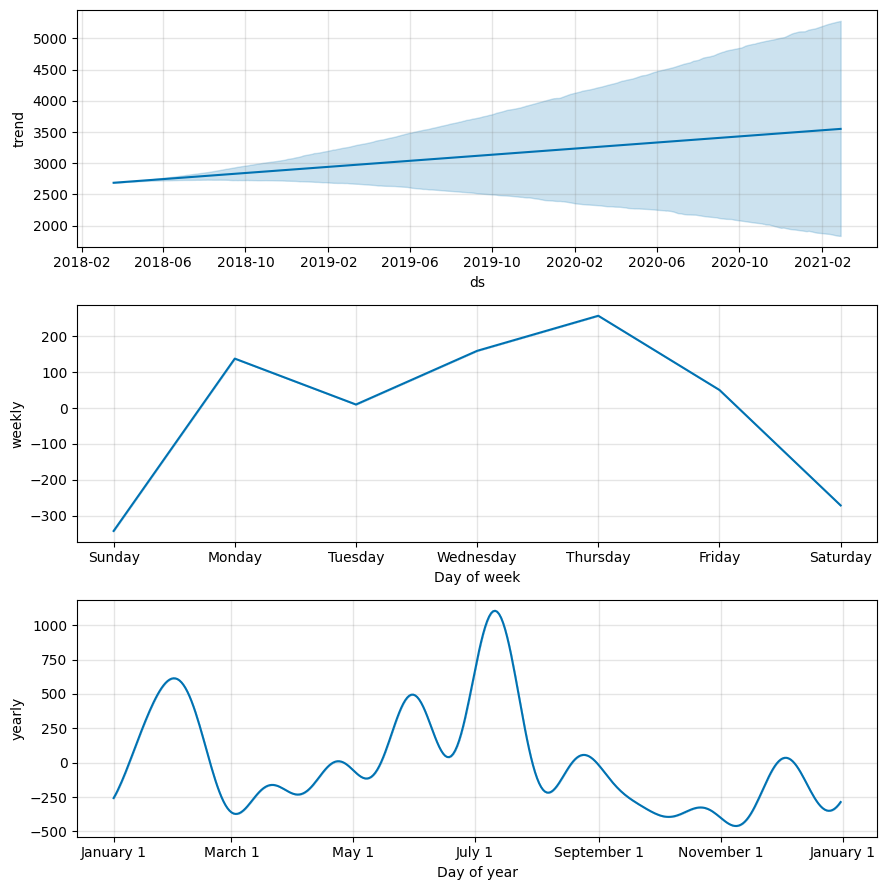

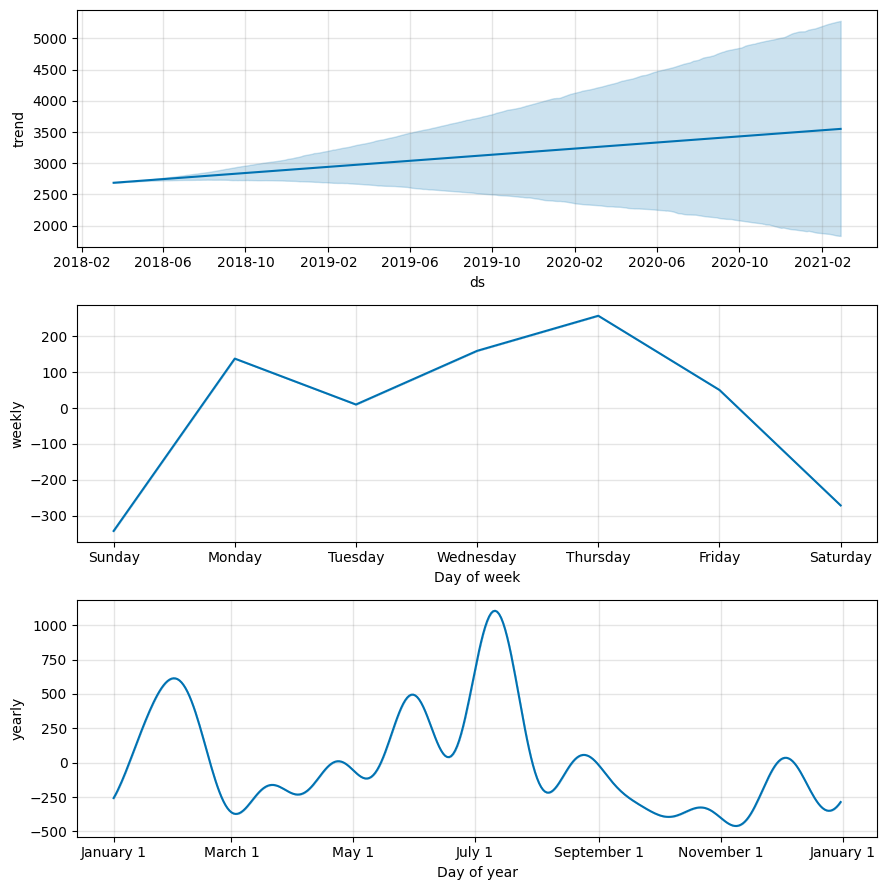

In [100]:
univariate_model.plot_components(forecaste_train)

In [101]:
daily_df.reset_index(inplace=True)
daily_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [102]:
##Setting the regression and prediction features for training
daily_df1 = daily_df.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3','ElecPrice':'y'})
daily_df1.head() 

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [103]:
train_df1 = daily_df1.iloc[:2757,:]
test_df1 = daily_df1.iloc[2757:,:]

multivariate_model = Prophet()

multivariate_model.add_regressor('add1')
multivariate_model.add_regressor('add2')
multivariate_model.add_regressor('add3')

In [104]:
multivariate_model.fit(train_df1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1a46vi8c/7sjke3q9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1a46vi8c/9768mm_j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5214', 'data', 'file=/tmp/tmp1a46vi8c/7sjke3q9.json', 'init=/tmp/tmp1a46vi8c/9768mm_j.json', 'output', 'file=/tmp/tmp1a46vi8c/prophet_modelq3u06gr8/prophet_model-20230404184835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:48:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:48:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [105]:
forecaste_train1 = multivariate_model.predict(test_df1)
forecaste_train1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1868.766952,-211.311568,4044.641799,1868.766952,1868.766952,-856.432627,-856.432627,-856.432627,0.235437,...,-84.486668,-84.486668,-84.486668,-39.239438,-39.239438,-39.239438,0.0,0.0,0.0,1988.271381
1,2018-03-21,1869.459198,-351.531486,4101.283126,1869.459198,1869.459198,-1026.456513,-1026.456513,-1026.456513,0.232644,...,42.522333,42.522333,42.522333,-29.944537,-29.944537,-29.944537,0.0,0.0,0.0,1979.670349
2,2018-03-22,1870.151445,503.134017,5102.811560,1870.151445,1870.151445,-214.972629,-214.972629,-214.972629,0.219109,...,145.630770,145.630770,145.630770,-24.905253,-24.905253,-24.905253,0.0,0.0,0.0,2899.980665
3,2018-03-23,1870.843692,315.848810,4689.915256,1870.843692,1870.843692,-274.914740,-274.914740,-274.914740,0.211160,...,-44.303208,-44.303208,-44.303208,-23.980248,-23.980248,-23.980248,0.0,0.0,0.0,2584.190044
4,2018-03-24,1871.535938,-920.925274,3598.455541,1871.535938,1871.535938,-1076.504930,-1076.504930,-1076.504930,0.209226,...,-117.549683,-117.549683,-117.549683,-26.918797,-26.918797,-26.918797,0.0,0.0,0.0,1437.185558


Q. 17: Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [106]:
mape = metric(test_df1['y'],forecaste_train1['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is:{round(mape, 2)}')

The Mean Average Percentage Error ( MAPE) is:232.73


Q. 18: What is the RMSE in 2 decimal places?

In [107]:
rmse = np.sqrt(mean_squared_error(test_df1['y'],forecaste_train1['yhat']))
print(f'The Root Mean Squared Error (RMSE) is: {round(rmse, 2)}')

The Root Mean Squared Error (RMSE) is: 2708.53


Q. 19: If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

answer = Thursday

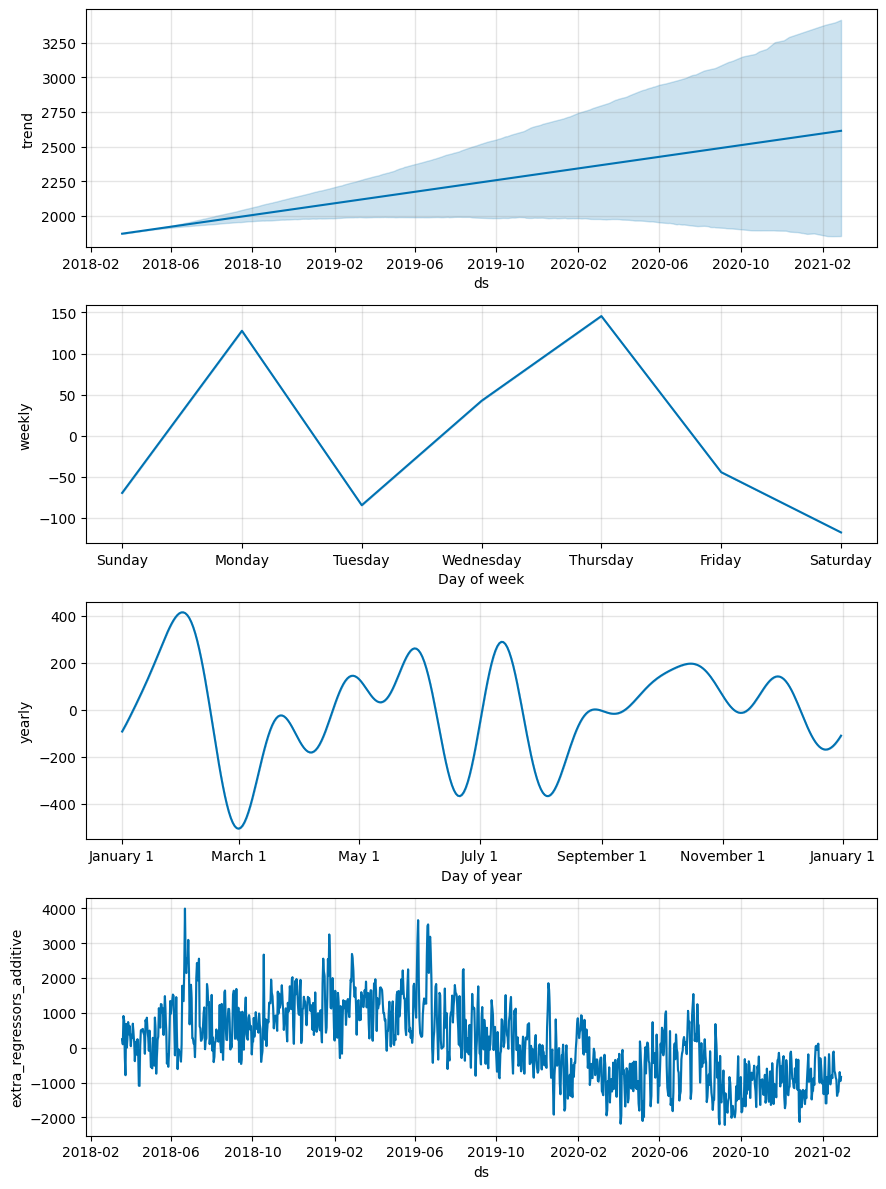

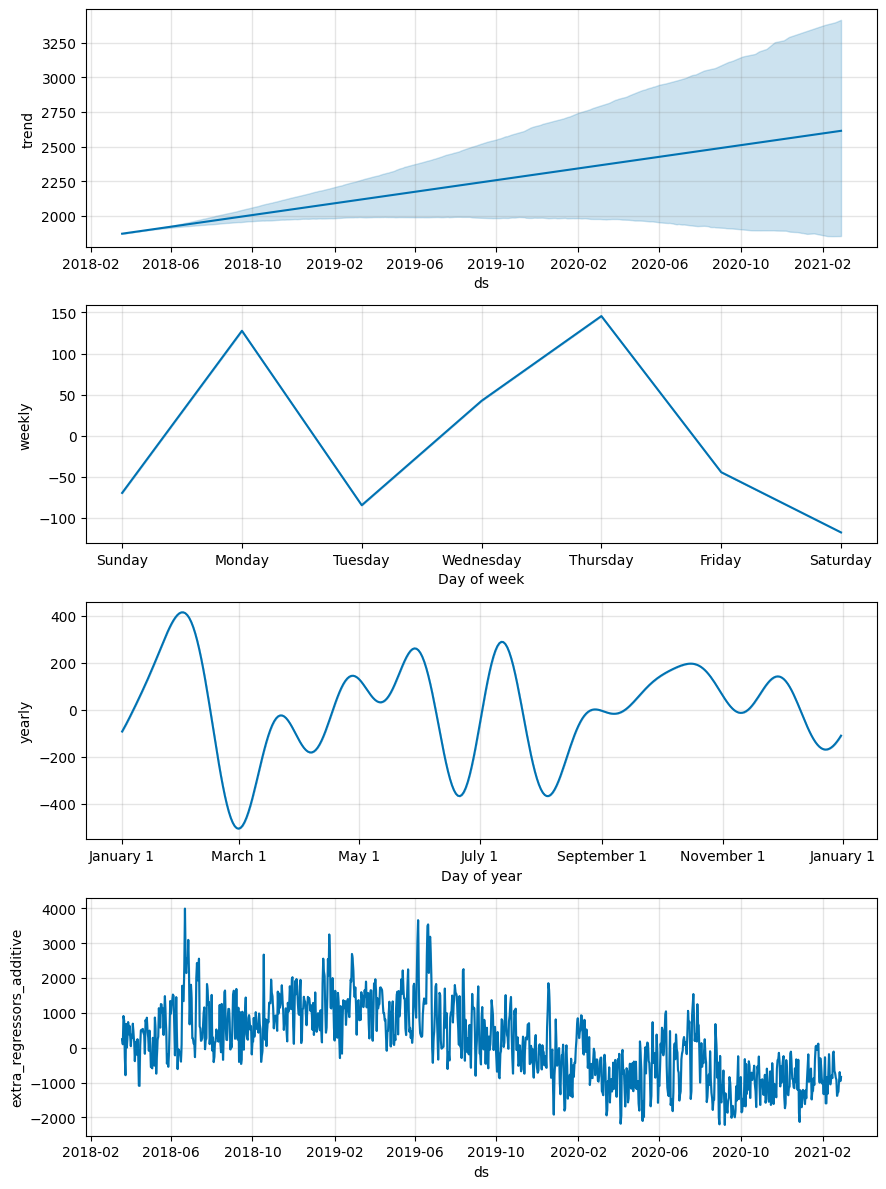

In [108]:
multivariate_model.plot_components(forecaste_train1)

In [109]:
train_2 = daily_df.iloc[:2757,:]
test_2 = daily_df.iloc[2757:,:]
daily_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [110]:
daily_df2 = daily_df.drop(columns=['Tmax'], inplace=True)
daily_df2 = daily_df.rename(columns = {'FullDate':'ds',
                                       'SysLoad':'add1',
                                       'GasPrice':'add3',
                                       'ElecPrice':'y'})
daily_df2.head() 

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [111]:
df_train_2 = daily_df2.iloc[:2757,:]
df_test_2 = daily_df2.iloc[2757:,:]

In [112]:
#multivariate model without tmax
multi_model = Prophet()
multi_model.add_regressor('add1')
multi_model.add_regressor('add3')
multi_model.fit(df_train_2)
forecast_3 = multi_model.predict(df_test_2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1a46vi8c/1eeooni0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1a46vi8c/z6n08dgg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52241', 'data', 'file=/tmp/tmp1a46vi8c/1eeooni0.json', 'init=/tmp/tmp1a46vi8c/z6n08dgg.json', 'output', 'file=/tmp/tmp1a46vi8c/prophet_model2hxi37r4/prophet_model-20230404184838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:48:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:48:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Q. 20: What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [113]:
mape = metric(df_test_2['y'], forecast_3['yhat'])
print(f'The Mean Average Percentage Error (MAPE) is:{round(mape, 2)}')

The Mean Average Percentage Error (MAPE) is:232.84
